 # Aim
 In  logistic Regression we want to classify our data set inot 0 or 1 (Classification Problem)
 Here in Titanic data set we classify weather survived or dead


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
train = pd.read_csv('titanic_train.csv')

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
# To check our data weather it has null values or not we use .info() we analyze that age and cabin conatians null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


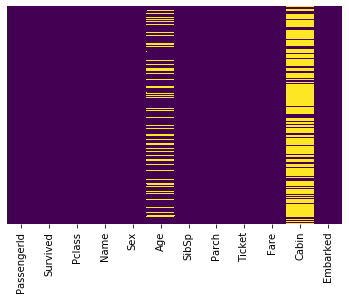

In [86]:
# it may contain null values(missing data) so check them with heat map
# we pass the data in a binary format (0 for  null and 1 if not),set the y to false and the bar color also (no need to analyze them)
# Age contains nulls and cabin is mostly null but survived doesnt coantian null values

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualizing the rest of the columns (data)

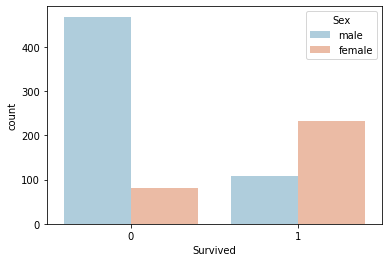

In [87]:
# Count the survived (the dead people are more) 

#sns.countplot(x='Survived',data=train,palette='RdBu_r')

# Add hue = sex to know wivh gender survived more (The male is higher in death)
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

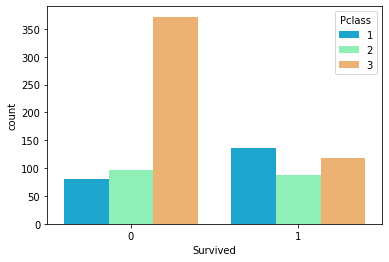

In [88]:
# analyzing the survived but with consederation of thier class 
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

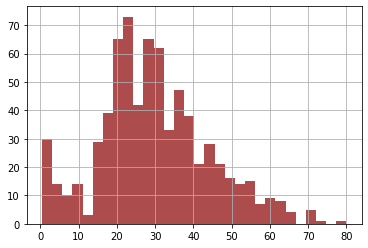

In [89]:
# analyzing the age column with pandas
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

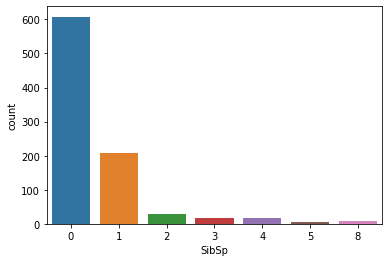

In [90]:
# counting the siblings (mostly passengers dont have)
sns.countplot(x='SibSp',data=train)

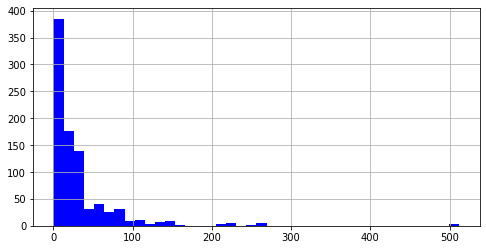

In [91]:
# most of the  passengers paid the cheapest fare between 0 and 100
train['Fare'].hist(color='blue',bins=40,figsize=(8,4))

# Data Preprocessing : 

  Fill in the null values
  
  convert categorial Features 

In [92]:
# fill the null values in Age with the mean avg age of the passengers based on the pClass of the passengers

In [93]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[train['Pclass'] == 1]['Age'].mean()

        elif Pclass == 2:
            return train[train['Pclass'] == 2]['Age'].mean()

        else:
            return train[train['Pclass'] == 3]['Age'].mean()

    else:
        return Age


In [94]:
# if axis = 0 then we apply on each element in the column
# if axis = 1 then we apply on the row 

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

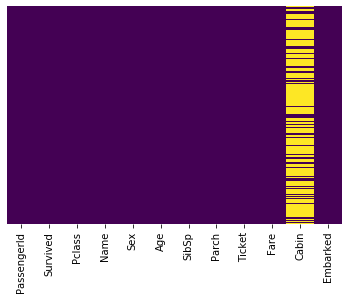

In [95]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# now only cabins contains null
# so we removed it
# drop cabins and re run the heatmap

train.drop('Cabin',axis=1,inplace=True)

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [97]:
# Converting Categorical Features
#   We'll need to convert categorical features to dummy variables using pandas! Otherwise our 
#     machine learning algorithm won't be able to directly take in those features as inputs.

In [98]:
# convert sex from m and f to 0 and 1 then we drop the female column since it will repeated (if male is 0 obviously female is 1)
sex = pd.get_dummies(train['Sex'],drop_first=True) 

In [99]:
# converting embraked from c s q to 0 1 but drop the c column since 
# so Emabrked has c s q in the 1st row it has s so in dumies we put at s 1 and the rest are 0 since thy didnt occur in that 
# row
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [100]:
# Now we drop the non- numerical values 
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [101]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [102]:
# we also drop passenger id since it is like a index it doesnt not make any diff in our data
train.drop(['PassengerId'], axis = 1 , inplace = True)

In [103]:
# Add the new categorial columns
train = pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=101)

In [107]:
# Train and Predict
from sklearn.linear_model import LogisticRegression

In [108]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) # fit the model on our data

c:\users\maia dandachi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
# predict the y of x_test
predictions = logmodel.predict(X_test)


# Evaluation

In [110]:
from sklearn.metrics import classification_report

Precision is the ability of a classifier not to label an instance positive that is actually negative. 

Precision = TP/(TP + FP)
________________________________

Recall is the ability of a classifier to find all positive instances
Recall = TP/(TP+FN)
Fraction of positives that were correctly identified.

The F1 score is the mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 

In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

